In [13]:
include("problemConditionStruct.jl"); 
include("./zeta.jl");
include("./maximum_contact_radius.jl");
include("./get_next_step.jl");
using LegendrePolynomials: collectPl
using Plots;

In [14]:


"""
    plot_current_conditions(Union{ProblemConditions, Vector{Float64}})

Plots the current conditions of the problem
"""
function plot_current_conditions(data::Union{ProblemConditions, Vector{Float64}}; center_of_mass::Float64 = NaN, theta::Float64 = NaN);

    if typeof(data) <: ProblemConditions; 
        if isnan(center_of_mass)
            center_of_mass = data.center_of_mass
        end
        data = data.deformation_amplitudes; 
    end
    if isnan(center_of_mass); center_of_mass = 1+sum([(-1)^ii * data[ii] for ii in eachindex(data)]); end
    d = length(data);
    ζ = zeta(data; order = d);
    # ζ(θ::Float64) = sum(data .* (collectPl(cos(θ), lmax = d).parent)[2:end]);
    x(θ::Float64) = sin(θ) * (1 + ζ(θ));
    y(θ::Float64) = center_of_mass + cos(θ) * (1 + ζ(θ));

    rrange = LinRange(0, 2π, 500);

    plt = plot(
        x.(rrange), y.(rrange), 
        lims = (-2, 2),
        lw = 2,
        label = ""
    )
    if !isnan(theta)
        #Plotting a specific line with tangent
        plot!([0.0, x(theta)], [center_of_mass, y(theta)], lw = 2, label = "");
        yp(xv) = calculate_exit_angle(data, theta) * (xv-x(theta)) + y(theta) 
        plot!([-100, 100], [yp(-100.0), yp(100.0)], lw = 2,
        label = "Contact angle at = $(round(theta; digits = 3)) radians");

    end

    # Plotting a line of maximum contact radius
    r = maximum_contact_radius(data)
    plot!([r, r], [-10, 10], lw = 3, label = "Maximum Contact radius");
    xlims!(-2, 2)
    ylims!(-0.2, 3)
    display(plt)
end




plot_current_conditions

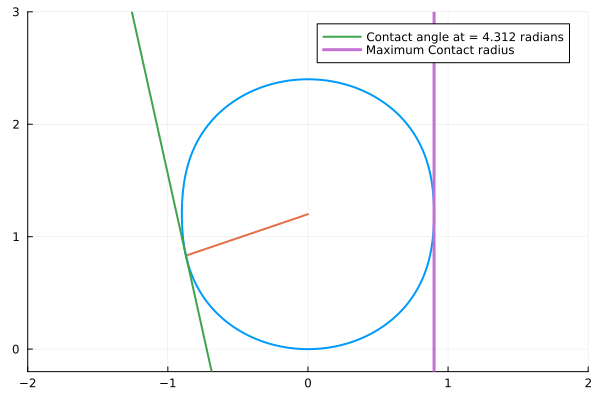

In [18]:
plot_current_conditions([0, 0.2]; theta = 3*pi/2-0.4 )


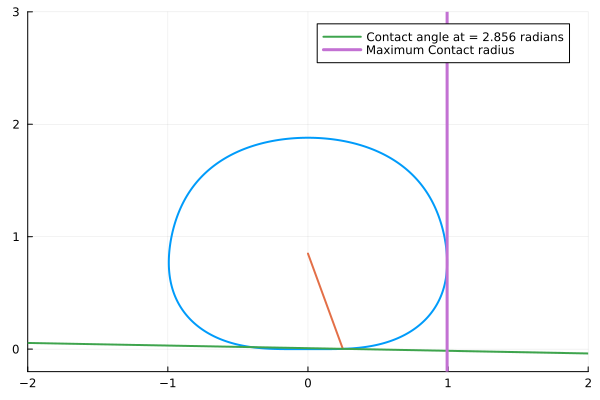

In [40]:
plot_current_conditions(0.15 .* [.2, -.1, .4, -.3]; theta = pi/1.1)

angle = pi/1.9;

